Q1) Use dataset Retail_Data_transaction.csv. Find average daily sale count. Use Poisson distribution to calculate and plot probability for average daily sale count +/- 10 transactions.

In [1]:
# Importing necessary libraries for data handling, visualization, and probability calculations
import matplotlib.pyplot as plt  # For plotting graphs
import pandas as pd  # For managing data
from scipy.stats import poisson  # For Poisson probability calculations

In [2]:
# Loading the retail transactions dataset from the specified file path
df = pd.read_csv('C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/Retail_Data_Transactions.csv')

In [3]:
# Display the first five rows of the retail transactions dataset
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [4]:
# Displaying detailed information about the dataset, including column names, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [5]:
# Grouping data by transaction date and calculating the average sales per day
df = df.groupby('trans_date').agg(avg_sales=('tran_amount', 'mean'))

In [6]:
# Converting 'avg_sales' to integer type for Poisson analysis
df['avg_sales'] = df['avg_sales'].astype(int)

In [7]:
# Display dataset information, including column names, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 01-Apr-12 to 31-Oct-14
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   avg_sales  1401 non-null   int32
dtypes: int32(1)
memory usage: 16.4+ KB


In [8]:
# Display the first five rows of the dataset to confirm changes
df.head()

,avg_sales
trans_date,
01-Apr-12,64
01-Apr-13,62
01-Apr-14,66
01-Aug-11,65
01-Aug-12,64


In [9]:
# Displaying dataset information, including column names, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 01-Apr-12 to 31-Oct-14
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   avg_sales  1401 non-null   int32
dtypes: int32(1)
memory usage: 16.4+ KB


In [10]:
# Computing the average daily sales count
avg_sale = df['avg_sales'].mean()  

# Printing the result
print(f"Average daily sales count: {avg_sale:.2f} transactions")

Average daily sales count: 64.54 transactions


In [11]:
# Defining the range for Poisson distribution, centered around the average daily sales count
k = range(int(avg_sale) - 10, int(avg_sale) + 11)  # +/- 10 transactions from the average

In [12]:
# Computing the Poisson probabilities for daily sales counts within the defined range
probabilities = poisson.pmf(k, avg_sale)

In [13]:
# Printing the computed Poisson probabilities for each sales count in the defined range
print("Poisson probabilities for each k: ")
for sale, prob in zip(k, probabilities):
    print(f"{sale} transactions: {prob:.4f}")  # Formatting probability to 4 decimal places for readability

Poisson probabilities for each k: 
54 transactions: 0.0218
55 transactions: 0.0256
56 transactions: 0.0295
57 transactions: 0.0334
58 transactions: 0.0371
59 transactions: 0.0406
60 transactions: 0.0437
61 transactions: 0.0462
62 transactions: 0.0481
63 transactions: 0.0493
64 transactions: 0.0497
65 transactions: 0.0493
66 transactions: 0.0482
67 transactions: 0.0465
68 transactions: 0.0441
69 transactions: 0.0413
70 transactions: 0.0380
71 transactions: 0.0346
72 transactions: 0.0310
73 transactions: 0.0274
74 transactions: 0.0239


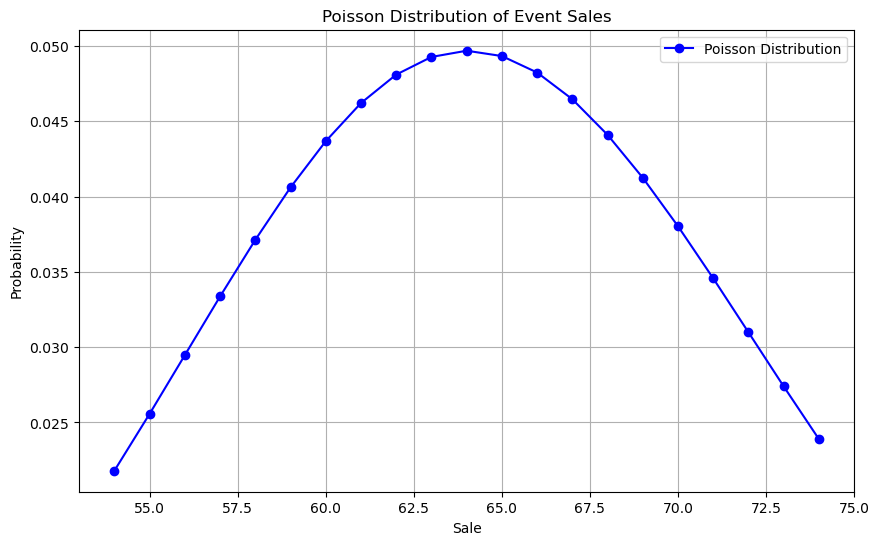

In [14]:
# Creating a figure for Poisson distribution visualization
plt.figure(figsize=(10, 6))  # Adjusting figure size for clarity

# Plotting the Poisson PMF using marker points for visibility
plt.plot(k, probabilities, label="Poisson Distribution", marker='o', color='blue')  

# Labeling the axes
plt.xlabel("Sale")  # X-axis represents the number of transactions
plt.ylabel("Probability")  # Y-axis represents the Poisson probability

# Adding title and legend for clear interpretation
plt.title("Poisson Distribution of Event Sales")
plt.legend()

# Enhancing readability with gridlines
plt.grid(True)

# Displaying the plot
plt.show()

2. Use titanic dataset. Calculate the historical probability of any passenger surviving. Use binomial distribution to calculate and plot probability of exactly 0 out of random 100 passengers surviving, exactly 1 out of random 100 passengers surviving, exactly 2 out of random 100 passengers surviving.... upto all 100 passengers surviving.

In [15]:
# Importing necessary libraries for binomial calculations and numerical operations
from scipy.stats import binom  # For binomial probability calculations
import numpy as np  # For handling numerical operations

In [16]:
# Loading the Titanic dataset from the specified file path
df = pd.read_csv("C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/titanic.csv")

In [17]:
# Display the first five rows of the Titanic dataset
df.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [18]:
# Number of passengers in the random sample
n = 100  

# Probability of survival based on historical data
p = df['survived'].mean()  

# Range of possible survivors (0 to 100)
k = np.arange(0, 101)  

In [19]:
# Computing binomial probabilities for different survival outcomes
probabilities = binom.pmf(k, n, p)

In [20]:
# Convert probabilities into a DataFrame for better readability
prob_df = pd.DataFrame({'Survivors': k, 'Probability': probabilities})

# Display the first few rows
prob_df.head()

,Survivors,Probability
0,0,9.321033e-22
1,1,5.806545e-20
2,2,1.790510e-18
3,3,3.643639e-17
4,4,5.504284e-16


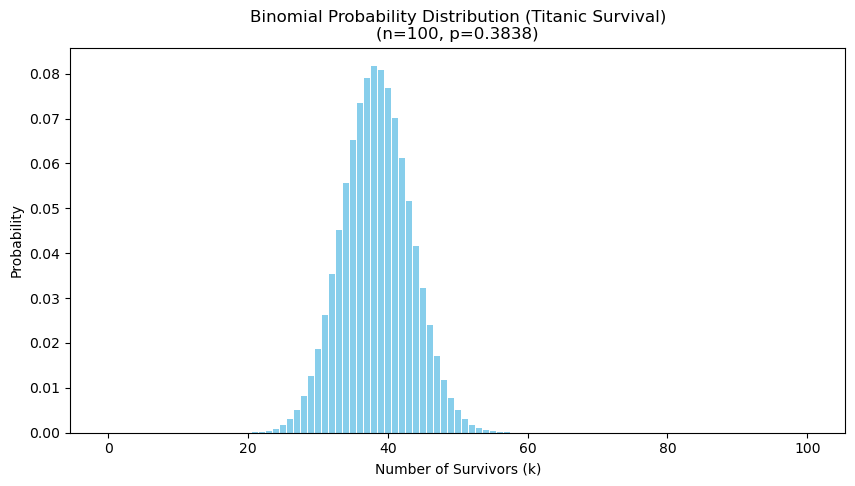

In [21]:
# Creating a figure for binomial probability visualization
plt.figure(figsize=(10, 5))  # Adjusting figure size for clear display

# Plotting a bar chart to represent probabilities
plt.bar(k, probabilities, color='skyblue')  

# Labeling the axes
plt.xlabel("Number of Survivors (k)")  # X-axis represents possible survivor counts
plt.ylabel("Probability")  # Y-axis represents the likelihood of each outcome

# Adding a title with survival probability for context
plt.title(f"Binomial Probability Distribution (Titanic Survival)\n(n=100, p={p:.4f})")

# Displaying the plot
plt.show()

3. Use billionaires dataset. Calculate Z-scores. Find and plot outlier.
http://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

In [22]:
# Importing necessary libraries for probability calculations and data handling
import pandas as pd  # For managing datasets
import numpy as np  # For numerical operations
from scipy.stats import norm  # For PDF and CDF calculations

In [23]:
# Loading the Billionaires dataset from the specified file path
df = pd.read_csv("C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/Billionaires_statistics.csv")

In [24]:
# Display the first two rows of the dataset
df.head(2)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [25]:
# Calculating the mean and standard deviation of final worth
finalWorth_mean = df['finalWorth'].mean()  # Average final worth
finalWorth_std = df['finalWorth'].std()  # Standard deviation of final worth

In [26]:
# Define the wealth range for PDF calculations
start_finalWorth = 100000  # Lower bound
end_finalWorth = 700000  # Upper bound

In [27]:
# Generating a small range of 'finalWorth' values within the specified interval
finalWorth_num_points = 2  # Number of points to generate
finalWorth_values_in_range = np.linspace(start_finalWorth, end_finalWorth, finalWorth_num_points)

In [28]:
# Compute the Probability Density Function (PDF) values for the defined wealth range
pdf_values_in_range = norm.pdf(finalWorth_values_in_range, start_finalWorth, finalWorth_std)

In [29]:
# Looping through the range of final worth values and printing associated PDF values
for i in range(len(finalWorth_values_in_range)):
    print(finalWorth_values_in_range[i], pdf_values_in_range[i])

100000.0 4.0566657137947625e-05
700000.0 0.0


In [30]:
# Computing the exact probability of wealth falling within the defined range using CDF
prob_range_exact = norm.cdf(end_finalWorth, finalWorth_mean, finalWorth_std) - norm.cdf(start_finalWorth, finalWorth_mean, finalWorth_std)

# Printing the result
print(prob_range_exact)

0.0


In [31]:
from scipy.stats import zscore

# Compute Z-scores for net worth
df["Z-score"] = zscore(df["finalWorth"])  # Standardized scores for detecting anomalies

# Display Z-scores
df["Z-score"]

0       20.989450
1       17.836602
2       11.124085
3       10.412152
4       10.310447
          ...    
2635    -0.368557
2636    -0.368557
2637    -0.368557
2638    -0.368557
2639    -0.368557
Name: Z-score, Length: 2640, dtype: float64

In [32]:
# Identifying outliers where Z-score is beyond the threshold (|Z| > 3)
outliers = df[df["Z-score"].abs() > 3]

# Displaying the outliers
print(outliers)

    rank  finalWorth               category  \
0      1      211000       Fashion & Retail   
1      2      180000             Automotive   
2      3      114000             Technology   
3      4      107000             Technology   
4      5      106000  Finance & Investments   
5      6      104000             Technology   
6      7       94500  Media & Entertainment   
7      8       93000                Telecom   
8      9       83400            Diversified   
9     10       80700             Technology   
10    11       80500       Fashion & Retail   
11    12       79200             Technology   
12    13       77300       Fashion & Retail   
13    14       76000             Technology   
14    15       68000        Food & Beverage   
15    16       64400             Technology   
16    17       59000            Diversified   
17    17       59000            Diversified   
18    19       58800       Fashion & Retail   
19    20       57600       Fashion & Retail   
20    21     

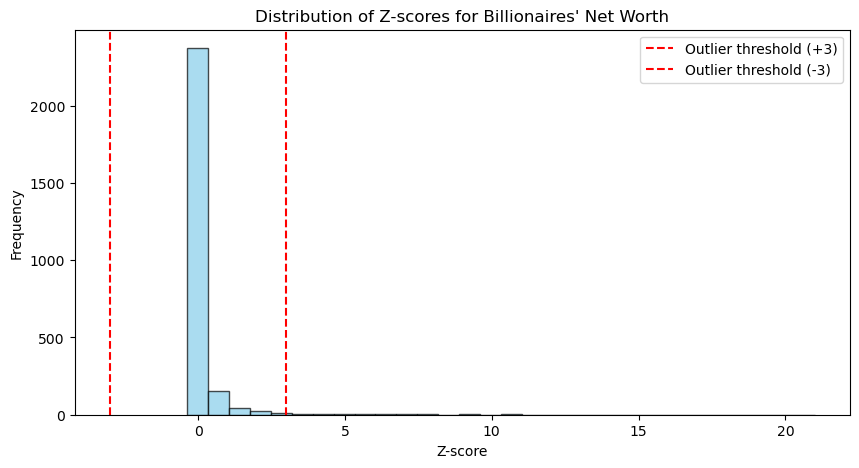

In [33]:
import matplotlib.pyplot as plt

# Creating a figure for Z-score distribution visualization
plt.figure(figsize=(10, 5))  # Adjusting figure size for clarity

# Plotting the histogram to show Z-score frequency
plt.hist(df["Z-score"], bins=30, color='skyblue', edgecolor='black', alpha=0.7)  

# Adding vertical lines for outlier thresholds
plt.axvline(3, color="red", linestyle="dashed", label="Outlier threshold (+3)")
plt.axvline(-3, color="red", linestyle="dashed", label="Outlier threshold (-3)")

# Labeling axes
plt.xlabel("Z-score")  
plt.ylabel("Frequency")  

# Adding a title for context
plt.title("Distribution of Z-scores for Billionaires' Net Worth")

# Displaying legend for clarity
plt.legend()

# Showing the plot
plt.show()

4. Do z-score analysis like above for the dataset http://www.kaggle.com/datasets/nasirayub2/australian-student-performancedata-aspd24
    Column: Final Exam Scores

In [34]:
# Loading the Australian Student Performance dataset from the specified file path
df = pd.read_csv("C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/Australian_Student_PerformanceData (ASPD24).csv")

In [35]:
# Display the first two rows of the dataset
df.head(2)

,Student ID,University ID,University Name,Age,Gender,Major,Year of Study,GPA,High School GPA,Entrance Exam Score,...,Research Involvement,Internship Experience,Peer Reviews,Academic Advising,Learning Style,Study Environment,Core Course Average,Extracurricular Participation,Peer Evaluations,Performance
0,1,86,University C,25,F,EE,1,2.06,3.50,60,...,0,0,61,5,Visual,Good,51,0,83,Satisfactory
1,2,17,University A,26,F,ME,4,2.12,3.46,52,...,0,1,72,7,Reading/Writing,Excellent,60,0,56,Poor


In [36]:
# Calculating the mean and standard deviation of final exam scores
score_mean = df['Final Exam Scores'].mean()  # Average final exam score
score_std = df['Final Exam Scores'].std()  # Standard deviation of final exam scores

In [37]:
# Define the specific range for PDF calculations
start_score = 50  # Lower bound for final exam scores
end_score = 95  # Upper bound for final exam scores

In [38]:
# Generating a small range of final exam score values within the specified interval
num_points = 2  # Number of points to generate
scores_values_in_range = np.linspace(start_score, end_score, num_points)

In [39]:
# Compute the Probability Density Function (PDF) values for the defined score range
pdf_values_in_range = norm.pdf(scores_values_in_range, score_mean, score_std)

In [40]:
# Looping through the range of exam scores and printing their associated PDF values
for i in range(len(scores_values_in_range)):
    print(scores_values_in_range[i], pdf_values_in_range[i])

50.0 0.00650808433643897
95.0 0.010152617970692432


In [41]:
# Compute the exact probability of a final exam score falling within the defined range using CDF
prob_range_exact = norm.cdf(end_score, score_mean, score_std) - norm.cdf(start_score, score_mean, score_std)

# Print the result
print(prob_range_exact)

0.8768601883260395


In [42]:
from scipy.stats import zscore

# Compute Z-scores for final exam scores to standardize values
df["Z-score"] = zscore(df["Final Exam Scores"])

In [43]:
df["Z-score"]

0         0.445584
1         0.307148
2        -1.492513
3         0.445584
4         1.276197
            ...   
100251   -0.800336
100252    0.791672
100253   -1.423296
100254   -0.731118
100255    1.553068
Name: Z-score, Length: 100256, dtype: float64

In [44]:
# Display the first few rows for clarity
df[["Final Exam Scores", "Z-score"]].head()

,Final Exam Scores,Z-score
0,81,0.445584
1,79,0.307148
2,53,-1.492513
3,81,0.445584
4,93,1.276197
